<a href="https://colab.research.google.com/github/Lujaina-E/Titanic-Predictions/blob/main/Xgboost_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy
import seaborn as sns
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,mean_squared_error, confusion_matrix


In [55]:
train_data = pd.read_csv('train.csv') #gets split into train and test
test = pd.read_csv('test.csv') #only usable for predictions

In [64]:
total = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Survived']]
total['Age'] = total['Age'].fillna(total['Age'].mean())
total_levelled = total.dropna()

x= total_levelled[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]
y = total_levelled[['Survived']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4, stratify=y)

In [66]:
x_predictor = test.iloc[:,:-1]
x_preidctor = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]

In [67]:
encode1 = LabelEncoder()
x_train.iloc[:,1] = encode1.fit_transform(x_train.iloc[:,1])
x_test.iloc[:,1] = encode1.fit_transform(x_test.iloc[:,1])

In [68]:
df = pd.DataFrame(x_train.head())
df['Sex'] = df['Sex'].astype('int64')
print(df.dtypes)
df

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Fare      float64
dtype: object


,Pclass,Sex,Age,SibSp,Fare
726,2,0,30.0,3,21.0000
177,1,0,50.0,0,28.7125
202,3,1,34.0,0,6.4958
609,1,0,40.0,0,153.4625
3,1,0,35.0,1,53.1000


In [69]:
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)
xg_boost_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model1 = xgb.XGBClassifier(n_estimators=30)


In [76]:
#train 3 models of slight difference, including one regression and two classifier
xg_boost_reg.fit(x_train, y_train)
model.fit(x_train,y_train)
model1.fit(x_train, y_train) #currently, this model has lowest MSE

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(n_estimators=30)

In [96]:
#Grid Search
clf = xgb.XGBClassifier()
grid_values = {'penalty': ['l1', 'l2', '13'],'C':[0.001,.009,0.01,.09,1,5,10,25, 30]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(x_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(x_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Grid Search Confusion matrix
confusion_matrix(y_test,y_pred_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Accuracy Score : 0.8406779661016949
Precision Score : 0.83
Recall Score : 0.7345132743362832
F1 Score : 0.7793427230046949


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

array([[165,  17],
       [ 30,  83]])

In [94]:
# MSE for classification doesn't make sense, but incase regression model is attempted
# y_predicted = model1.predict(x_test)
# MSE = mean_squared_error(y_test,y_predicted)
# print('Error:', MSE)

Error: 0.16271186440677965


Text(0.5, 1.0, 'Variable Correlation')

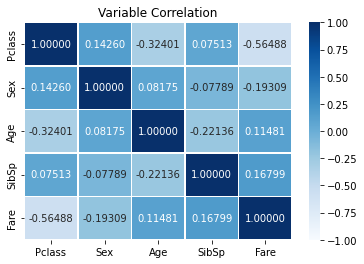

In [73]:
#correlation matrix 
matrix = x_train.copy()
for col in matrix.columns:
    if matrix[col].dtype == "O":
         matrix[col] = matrix[col].factorize(sort=True)[0]
corr_matrix = matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.5f', cmap="Blues", cbar=True, linewidths=0.5)
plt.title("Variable Correlation")
#note: potentially take out PClass from prediction because little correlation